# Exploratory model for GAL switch in yeast
#### nicole pagane | fall 18 | roberts lab

In [8]:
import scipy.integrate as snt
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
pass

## nucleosome stochastic modification
Ian B. Dodd (Theoretical Analysis of Epigenetic Cell Memory by Nucleosome Modification, 2007)

"Time, t, in the model is defined as average attempted nucleosome conversions per nucleosome. We are aware of no experimental data allowing us to constrain F values or to relate t to real time."

In [9]:
def nucSim(N, Evec, tIter, F, sup = True):
    # partition function
    T = 298
    k = 1.381e-23
    Z = 0
    for i in Evec: Z += np.exp(-i/(k*T))
    # probabilities of methyltated, acetylated, and unmodified
    if not sup:
        string = ['m','a', 'u']
        for i in range(len(Evec)): print string[i] + ': ' + str(np.exp(-Evec[i]/(k*T))/Z)
    # initate random nucleosome state sites (combinatorics)
    #where -1 = methylation, 0 = unmodified, 1 = acetylation
    nuc = np.linspace(0, N-1, N).tolist()
    nucInd = {}
    for i in range(len(Evec)):
        if i < len(Evec)-1:
            l = np.round(N*(np.exp(-Evec[i]/(k*T))/Z))
        else:
            l = len(nuc)
        temp = np.random.choice(nuc, int(l), replace = False)
        nucInd[i] = temp
        for j in temp:
            nuc.remove(j)
    # check for sensical initialization
    if (len(nuc) != 0):
        print 'what the, try initialization again'
    else:
        nuc = np.zeros(N)
        for i in range(len(Evec)):
            for j in range(len(nucInd[i])):
                nuc[int(nucInd[i][j])] = i - 1
    if not sup:
        print string[0] + ': ' + str(np.sum(nuc == -1))
        print string[1] + ': ' + str(np.sum(nuc == 0))
        print string[2] + ': ' + str(np.sum(nuc == 1))
    # time 0 nucleosome sites
    t = 0
    nucHistory = {}
    nucHistory[t] = {}
    nucHistory[t]['sites'] = nuc*1
    nucHistory[t]['color'] = ['blue' for i in range(N)]
    nucHistory[t]['size'] = [5 for i in range(N)]
    nucList = []
    #nucleosome stochastic simulation
    alpha = F*1.0/(1+F)
    if not sup: print 'alpha: ' + str(alpha)
    while t <= tIter:
        #random numbers
        n1 = rnd.randint(0,N-1)
        n2 = rnd.randint(0,N-1)
        prob = rnd.random()
        color1 = 'blue' #aethestics
        color2 = 'blue' #aethestics
        size = 10
        if (prob < alpha):
            size = 20 #aethestics
            color1 = 'red' #aethestics
            color2 = 'orange' #aethestics
            #make n1 closer to n2
            nuc[n1] = (nuc[n1] + nuc[n2])
            #taper if greater than 1 or less than -1
            if nuc[n1] > 1: nuc[n1] = 1
            if nuc[n1] < -1: nuc[n1] = -1
        else:
            nuc[n1] = (nuc[n1] + np.random.randint(-1,2,1)[0])
            #taper if greater than 1 or less than -1
            if nuc[n1] > 1: nuc[n1] = 1
            if nuc[n1] < -1: nuc[n1] = -1
            color1 = 'green' #aethestics
            size = 20 #aethestics
            '''
            prob = rnd.random()
            #random noise n1 change
            if (prob < 1.0/3):
                # acetylation
                nuc[n1] = (nuc[n1] + 1) % 1
                color1 = 'green'
                size = 20
            elif (prob < 2.0/3):
                # methylation
                nuc[n1] = (nuc[n1] - 1) % 1
                color1 = 'green'
                size = 20
                
            '''
        #increment time and append to nucleosome sim dictionary 
        t += 1
        nucHistory[t] = {}
        nucHistory[t]['sites'] = nuc*1
        colorVec = ['blue' for i in range(N)]; colorVec[n1] = color1; colorVec[n2] = color2; #aethestics
        nucHistory[t]['color'] = colorVec #aethestics
        sizeVec = [10 for i in range(N)]; sizeVec[n1] = size; sizeVec[n2] = size; #aethestics
        nucHistory[t]['size'] = sizeVec #aethestics
    return nucHistory

m: 0.3333333333333333
a: 0.3333333333333333
u: 0.3333333333333333
m: 20
a: 20
u: 20
alpha: 0.666666666667


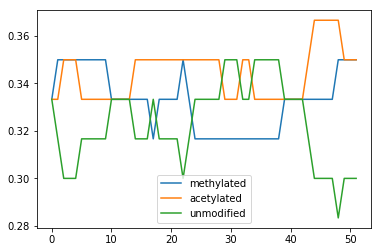

In [10]:
N = 60
T = 298
k = 1.381e-23
Evec = [0, # methylated
        0, # acetylated
        0] # unmodified
tIter = 50
F = 2.0
nucHistory = nucSim(N, Evec, tIter, F, sup = False)

me = []
ac = []
un = []
for i in range(len(nucHistory)):
    me.append(len(nucHistory[i]['sites'][nucHistory[i]['sites'] == -1])*1.0/N)
    ac.append(len(nucHistory[i]['sites'][nucHistory[i]['sites'] == 1])*1.0/N)
    un.append(len(nucHistory[i]['sites'][nucHistory[i]['sites'] == 0])*1.0/N)
plt.plot(np.linspace(0,tIter+1,tIter+2), me)
plt.plot(np.linspace(0,tIter+1,tIter+2), ac)
plt.plot(np.linspace(0,tIter+1,tIter+2), un)
plt.legend(['methylated', 'acetylated', 'unmodified'])
plt.show()

In [11]:
numFrames = 50

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=True)

times = np.linspace(0, len(nucHistory) - 1, numFrames)

# make list of nucleosomes
nucSites = np.linspace(1, N, N)

# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': nucSites, 'title': 'Nucleosome Sites'}
figure['layout']['yaxis'] = {'title': 'State'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': 0,
    'plotlycommand': 'animate',
    'values': times.tolist(),
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'time:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
time = 0
data_dict = {
    'x': nucSites.tolist(),
    'y': nucHistory[time]['sites'].tolist(),
    'mode': 'markers',
    'marker': {
        'color': nucHistory[time]['color'],
        'size': nucHistory[time]['size'],
    },
}
figure['data'].append(data_dict)
    
# make frames
for time in times:
    time = int(time)
    frame = {'data': [], 'name': str(time)}
    data_dict = {
        'x': nucSites.tolist(),
        'y': nucHistory[time]['sites'].tolist(),
        'mode': 'markers',
        'marker': {
            'color': nucHistory[time]['color'],
            'size': nucHistory[time]['size'],
        },
    }
    frame['data'].append(data_dict)
    figure['frames'].append(frame)
    slider_step = {'args': [
        [time],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': time,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

In [12]:
N = 60
Evec = [0, # methylated
        0, # acetylated
        0] # unmodified

tIter = 5000
nSim = 50

F = 1.0
nSim = 50
me1 = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
un1 = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
ac1 = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
for i in range(nSim):
    nucHistory = nucSim(N, Evec, tIter, F)
    for j in range(len(nucHistory)):
        me1[i][j] = np.sum(nucHistory[j]['sites'] == -1)
        un1[i][j] = np.sum(nucHistory[j]['sites'] == 0)
        ac1[i][j] = np.sum(nucHistory[j]['sites'] == 1)

F = 2.0
nSim = 50
me2 = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
un2 = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
ac2 = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
for i in range(nSim):
    nucHistory = nucSim(N, Evec, tIter, F)
    for j in range(len(nucHistory)):
        me2[i][j] = np.sum(nucHistory[j]['sites'] == -1)
        un2[i][j] = np.sum(nucHistory[j]['sites'] == 0)
        ac2[i][j] = np.sum(nucHistory[j]['sites'] == 1)

F = 3.0
me3 = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
un3 = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
ac3 = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
for i in range(nSim):
    nucHistory = nucSim(N, Evec, tIter, F)
    for j in range(len(nucHistory)):
        me3[i][j] = np.sum(nucHistory[j]['sites'] == -1)
        un3[i][j] = np.sum(nucHistory[j]['sites'] == 0)
        ac3[i][j] = np.sum(nucHistory[j]['sites'] == 1)

F = 1
F = 2
F = 3


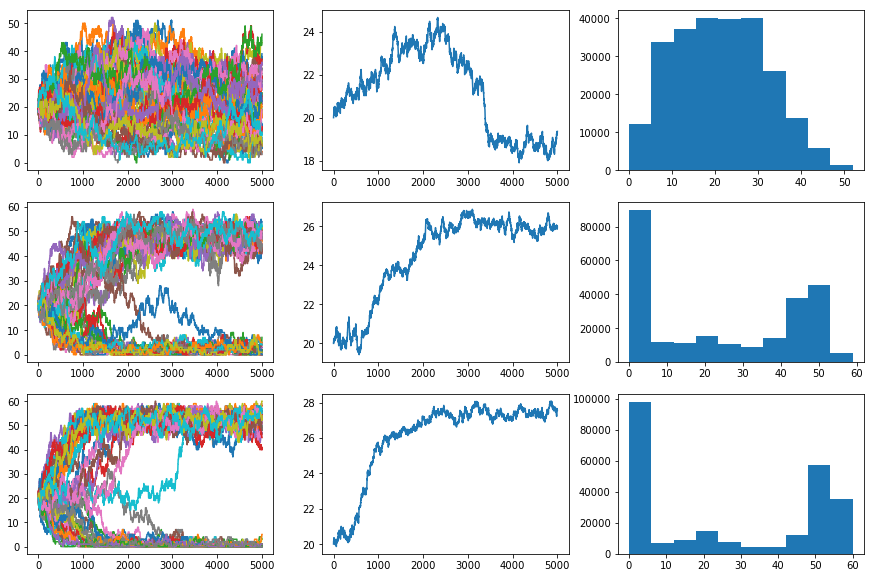

In [13]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(3,3,1)
for i in range(nSim):
    ax1.plot(me1[i,:])
ax2 = fig.add_subplot(3,3,2)
ax2.plot(np.mean(me1,0))
ax3 = fig.add_subplot(3,3,3)
ax3.hist(me1.reshape([nSim*(tIter+2), 1]))

ax4 = fig.add_subplot(3,3,4)
for i in range(nSim):
    ax4.plot(me2[i,:])
ax5 = fig.add_subplot(3,3,5)
ax5.plot(np.mean(me2,0))
ax6 = fig.add_subplot(3,3,6)
ax6.hist(me2.reshape([nSim*(tIter+2), 1]))

ax7 = fig.add_subplot(3,3,7)
for i in range(nSim):
    ax7.plot(me3[i,:])
ax8 = fig.add_subplot(3,3,8)
ax8.plot(np.mean(me3,0))
ax9 = fig.add_subplot(3,3,9)
ax9.hist(me3.reshape([nSim*(tIter+2), 1]))

print 'F = 1'
print 'F = 2'
print 'F = 3'

plt.show()

F = 1
F = 2
F = 3


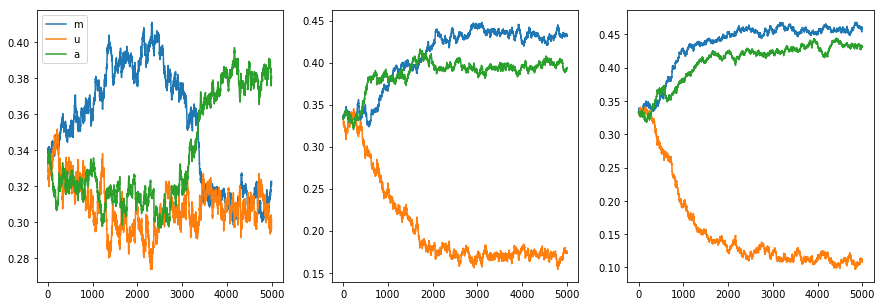

In [14]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
ax1.plot(np.mean(me1, 0)*1.0/N)
ax1.plot(np.mean(un1, 0)*1.0/N)
ax1.plot(np.mean(ac1, 0)*1.0/N)
ax1.legend(['m', 'u', 'a'])

ax2 = fig.add_subplot(1,3,2)
ax2.plot(np.mean(me2, 0)*1.0/N)
ax2.plot(np.mean(un2, 0)*1.0/N)
ax2.plot(np.mean(ac2, 0)*1.0/N)

ax3 = fig.add_subplot(1,3,3)
ax3.plot(np.mean(me3, 0)*1.0/N)
ax3.plot(np.mean(un3, 0)*1.0/N)
ax3.plot(np.mean(ac3, 0)*1.0/N)

print 'F = 1'
print 'F = 2'
print 'F = 3'

plt.show()

In [15]:
N = 60
T = 298
k = 1.381e-23
tIter = 1000

F = 3.0
trials = {}
ntrials = 0
param = np.linspace(-1, 1, 10)
for m in param:
    for l in param:
        Evec = [m*k*T, # methylated
                l*k*T, # acetylated
                0] # unmodified
        # simulation
        me = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
        un = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
        ac = np.asarray(np.zeros((tIter+2)*nSim)).reshape([nSim, tIter+2])
        for i in range(nSim):
            nucHistory = nucSim(N, Evec, tIter, F)
            for j in range(len(nucHistory)):
                me[i][j] = np.sum(nucHistory[j]['sites'] == -1)
                un[i][j] = np.sum(nucHistory[j]['sites'] == 0)
                ac[i][j] = np.sum(nucHistory[j]['sites'] == 1)
        trials[ntrials] = [me, un, ac]
        ntrials += 1


KeyboardInterrupt: 

In [ ]:
diff = []
for i in param:
    for j in param:
        diff.append((i*k*T - j*k*T)/np.sqrt((i*k*T)**2 + (j*k*T)**2))
        #diff.append(i*k*T - j*k*T)
        
print 'dE (acetylated - methylated)'

for i in range(len(trials)):
    #plt.plot(diff[i], np.mean(trials[i][0][:,-1])*1.0/N, 'bo') # me
    #plt.plot(diff[i], np.mean(trials[i][1][:,-1])*1.0/N, 'o', color ='orange') # un 
    plt.plot(diff[i], np.mean(trials[i][2][:,-1])*1.0/N, 'go') # ac

plt.xlabel('dE'); plt.ylabel('fraction of state'); 
plt.show()

Ok scrapping old model, but attempting with diffusing nucleosomes for fun before COPASI/LMES and more reading 

In [16]:
#viscosity of solution
eta = 1e-3 #Pa*s

#radius of nucleosome
r = 4.11e-10 #m

#number of compartments
K = 100
Kn = 50 # number of nucleosomes

#one-dimensional length of lattice gradient (gene)
L = K*r #m

#iterations of the gillepsie algorithm
n = 50

#how many runs to stochasticly simulate to get overall distribution
Sim = 50

#original far left and far right compartment species numbers
N = {}

In [17]:
k = 1.38e-23 #J/K
D = (k*T)/(6*np.pi*eta*r)
N['D'] = D
N['L'] = L
N['K'] = K
N['Kn'] = Kn
N['Evec'] = [0, # methylated
             0, # acetylated
             0] # unmodified

# gillespie with constant boundary concentrations
def gillespieBoundary(N, n, sup = True):
    L = N['L']
    K = N['K']
    D = N['D']
    Evec = N['Evec']
    Kn = N['Kn']
    # partition function
    T = 298
    k = 1.381e-23
    Z = 0
    for i in Evec: Z += np.exp(-i/(k*T))
    # probabilities of methyltated, acetylated, and unmodified
    if not sup:
        string = ['m','a','u']
        for i in range(len(Evec)): print string[i] + ': ' + str(np.exp(-Evec[i]/(k*T))/Z)
    # initate random nucleosome state sites (combinatorics)
    #where -1 = methylation, 0 = unmodified, 1 = acetylation
    nuc = np.linspace(0, K-1, K).tolist()
    nucInd = {}
    for i in range(len(Evec)):
        l = np.round(Kn*(np.exp(-Evec[i]/(k*T))/Z))
        temp = np.random.choice(nuc, int(l), replace = False)
        nucInd[i] = temp
        for j in temp:
            nuc.remove(j)
    nuc = np.zeros(K)+2
    for i in range(len(Evec)):
        for j in range(len(nucInd[i])):
            nuc[int(nucInd[i][j])] = i - 1
    if not sup:
        print string[0] + ': ' + str(np.sum(nuc == -1))
        print string[1] + ': ' + str(np.sum(nuc == 0))
        print string[2] + ': ' + str(np.sum(nuc == 1))
    # aesthetics
    nucHistory = {}
    nucHistory[0] = {}
    nucHistory[0]['sites'] = nuc*1
    nucHistory[0]['color'] = ['blue' for i in range(K)]
    nucHistory[0]['size'] = [5 for i in range(K)]
    # gillespie init
    h = L/K
    d = D/(h**2)
    tt = 0
    tvec = np.zeros(n)
    nucMat = np.matrix(np.zeros([n+1,K]))
    nucMat[0,:] = nuc
    # gillespie
    for i in range(0,n):
        a = nuc*d
        a0 = 2*d #2*d*Kn #- d*x[0] - d*x[-1]
        tt = tt + np.random.exponential(1/a0,1)
        rand = np.random.random()
        n1 = rnd.randint(0,K-1)
        direc = np.random.randint(-1,2,1)[0]
        if n1 == K - 1 and direc == 1: direc = 0
        if n1 == 0 and direc == -1: direc = 0
        n2 = n1 + direc
        if nuc[n2] == 2:
            temp = nuc[n1]
            nuc[n1] = nuc[n2]
            nuc[n2] = temp
            color = 'green' #aethestics
            size = 20
        else:
            color = 'blue' #aethestics
            size = 10
        tvec[i] = tt
        nucMat[i+1,:] = nuc
        # aesthetics
        nucHistory[i+1] = {}
        nucHistory[i+1]['sites'] = nuc*1
        colorVec = ['blue' for j in range(K)]; colorVec[n1] = color; colorVec[n2] = color;
        nucHistory[i+1]['color'] = colorVec 
        sizeVec = [10 for j in range(K)]; sizeVec[n1] = size; sizeVec[n2] = size;
        nucHistory[i+1]['size'] = sizeVec 
    return np.asarray([tvec, nucMat, nucHistory])

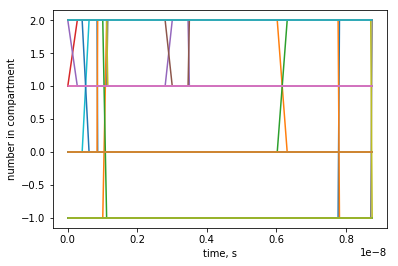

In [18]:
#reaction diffusion keeping the far cells at constant concentration
out = gillespieBoundary(N, n)

for i in range(K):
    plt.plot(out[0],out[1][:,i][0:n])
    
plt.xlabel('time, s')
plt.ylabel('number in compartment')
plt.show()

In [19]:
numFrames = 50

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=True)

times = np.linspace(0, len(out[0]) - 1, numFrames)

# make list of nucleosomes
nucSites = np.linspace(1, K, K)

# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': nucSites, 'title': 'Nucleosome Sites'}
figure['layout']['yaxis'] = {'title': 'State'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': 0,
    'plotlycommand': 'animate',
    'values': times.tolist(),
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'time:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
time = 0
data_dict = {
    'x': nucSites.tolist(),
    'y': out[2][time]['sites'].tolist(),
    'mode': 'markers',
    'marker': {
        'color': out[2][time]['color'],
        'size': out[2][time]['size'],
    },
}
figure['data'].append(data_dict)
    
# make frames
for time in times:
    time = int(time)
    frame = {'data': [], 'name': str(time)}
    data_dict = {
        'x': nucSites.tolist(),
        'y': out[2][time]['sites'].tolist(),
        'mode': 'markers',
        'marker': {
            'color': out[2][time]['color'],
            'size': out[2][time]['size'],
        },
    }
    frame['data'].append(data_dict)
    figure['frames'].append(frame)
    slider_step = {'args': [
        [time],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': time,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

In [136]:
n = 5000
nSim = 30

siteBeginning = np.asarray(np.zeros((n+2)*nSim)).reshape([nSim, n+2])
siteMiddle = np.asarray(np.zeros((n+2)*nSim)).reshape([nSim, n+2])
siteLast = np.asarray(np.zeros((n+2)*nSim)).reshape([nSim, n+2])
for i in range(nSim):
    out = gillespieBoundary(N, n)
    for j in range(len(out[0])):
        siteBeginning[i][j] = out[2][j]['sites'][0]
        siteMiddle[i][j] = out[2][j]['sites'][int(Kn/2)]
        siteLast[i][j] = out[2][j]['sites'][-1]

average initial state for first site : 0.9484206317473011
average initial state for middle site : 1.4736105557776888
average initial state for last site : 0.18472610955617752


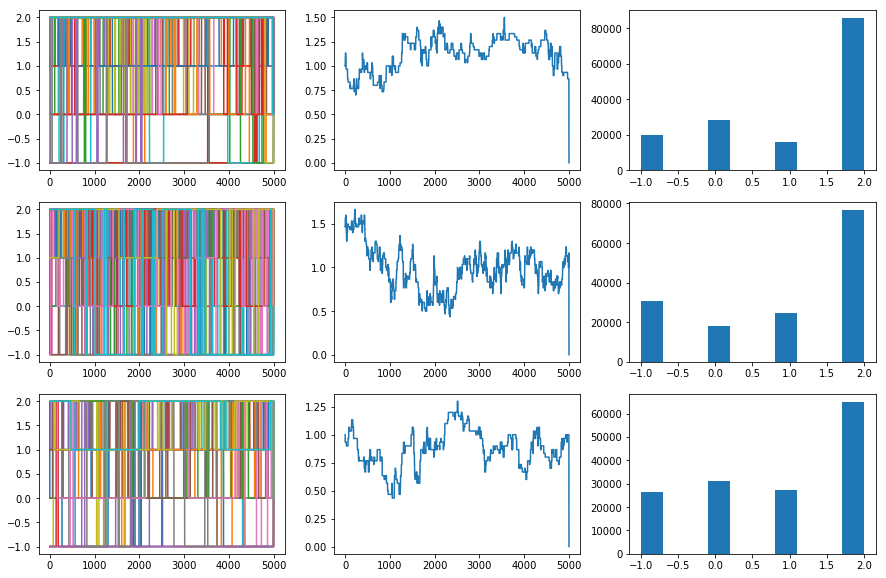

In [137]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(3,3,1)
for i in range(nSim):
    ax1.plot(siteBeginning[i,:])
ax2 = fig.add_subplot(3,3,2)
ax2.plot(np.mean(siteBeginning,0))
ax3 = fig.add_subplot(3,3,3)
ax3.hist(siteBeginning.reshape([nSim*(n+2), 1]))

ax4 = fig.add_subplot(3,3,4)
for i in range(nSim):
    ax4.plot(siteMiddle[i,:])
ax5 = fig.add_subplot(3,3,5)
ax5.plot(np.mean(siteMiddle,0))
ax6 = fig.add_subplot(3,3,6)
ax6.hist(siteMiddle.reshape([nSim*(n+2), 1]))

ax7 = fig.add_subplot(3,3,7)
for i in range(nSim):
    ax7.plot(siteLast[i,:])
ax8 = fig.add_subplot(3,3,8)
ax8.plot(np.mean(siteLast,0))
ax9 = fig.add_subplot(3,3,9)
ax9.hist(siteLast.reshape([nSim*(n+2), 1]))

print 'average initial state for first site : ' + str(np.mean(siteBeginning[0]))
print 'average initial state for middle site : ' + str(np.mean(siteMiddle[0]))
print 'average initial state for last site : ' + str(np.mean(siteLast[0]))

plt.show()

## reactions and parameters
This is a simple model of the GAL switch in yeast.<br>
Terms to add/develop into model:<br>
<ul>
    <li>G2p (galactose transporter)</li>
    <li>G1p's functionality for signal transduction and only utilize it to metabolize galactose</li>
    <li>ES-complex formation to metabolize galactose and resultant high levels of G1p throughout</li>
    <li>kinetics of transcription and translation (assumed to be proportional to the effects of upstream regulation)</li>
    <li>RNA Polymerase II elongation rate on a GAL promoter driven gene = 2kb/min</li>
 </ul>


In [ ]:
# reactions 
# gal + G3p -> G3p-gal (kgalon)
# G3p-gal -> gal + G3p (kgaloff)
# G3p-gal + G80p -> G3p-gal-G80p (kg80on)
# G3p-gal-G80p -> G3p-gal + G80p (kg80off)
# G80p + UASg -> G80p-UASg (kinon)
# G80p-UASg -> G80p + UASg (kinoff)
# G4p + UASg -> G4p-UASg (kacon)
# G4p-UASg -> G4p + UASg (kacoff)
# G4p-UASg -> G1p + G4p-UASg (kg1)
# G4p-UASg -> G3p + G4p-UASg (kg3)
# G4p-UASg -> G80p + G4p-UASg (kg80)
# G1p + gal -> G1p (kgalcat)

# rate constants
# these rates were taken from (Bianchi 2018)
kgalon = 7.45e-7
kgaloff =890
kg80on = 0.025716
kg80off = 0.0159616
kinon = 0.1
kinoff = 0.134989
kacon = 0.1
kacoff = 0.384615
kg1 =  1.92541
kg3 = 55.4518
kg80 = 3.67368
kgalcat = 3350 # this is just kcat

# initial concentrations
gal0 = 1e-3
G1p0 = 0.25e-6 # assume to be the same as G3p0 for now
G3p0 = 0.25e-6
G4p0 = 0.005e-6
G80p0 = 0.05e-6
UASg0 = 0 # assume completely repressed
G3pGal0 = 0 
G3pGalG80p0 = 0
G80pUASg0 = 1e-7 # assume completely repressed
G4pUASg0 = 0 # assume completely repressed

# species conservation
# UASg = G80p-UASg0 - G80p-UASg - G4p-UASg 

# define reaction rates function
#where spec[0] = gal, spec[1] = G1p, spec[2] = G3p, spec[3] = G4p
#      spec[4] = G80p, spec[5] = G3p-gal, spec[6] = G3p-gal-G80p,
#      spec[7] = G80p-UASg, spec[8] = G4p-UASg
def rates(spec, t):
    return np.asarray([
        -kgalon*spec[0]*spec[2] + kgaloff*spec[5] - kgalcat*spec[1]*spec[0], # dgal/dt
        kg1*spec[8], # dG1p/dt
        -kgalon*spec[0]*spec[1] + kgaloff*spec[5] + kg3*spec[8], # dG3p/dt
        -kacon*spec[3]*(G80pUASg0 - spec[7] - spec[8]) + kacoff*spec[8], # dG4p/dt
        -kg80on*spec[5]*spec[4] + kg80off*spec[6] - kinon*spec[5]*(G80pUASg0 - spec[7] - spec[8]) + kinoff*spec[7] + kg80*spec[8], # dG80p/dt
        kgalon*spec[0]*spec[1] - kgaloff*spec[5] - kg80on*spec[5]*spec[4] + kg80off*spec[6], # dG3pGal/dt
        kg80on*spec[4]*spec[5] - kg80off*spec[6], # dG3pGalG80/dt
        kinon*spec[5]*(G80pUASg0 - spec[7] - spec[8]) - kinoff*spec[7], # G80pUASg/dt
        kacon*spec[3]*(G80pUASg0 - spec[7] - spec[8]) - kacoff*spec[8]# G4pUASg/dt
    ])


In [ ]:
fig = plt.figure(figsize = (40,40))

# solve the DE numerically
t = np.linspace(0,10, 1000)
spec0 = (gal0, G1p0, G3p0, G4p0, G80p0, G3pGal0, G3pGalG80p0,G80pUASg0,G4pUASg0)
ode = snt.odeint(rates, spec0, t, hmax=1e-5)

# plot the numerical solution
specs = ['gal', 'G1p', 'G3p', 'G4p', 'G80p', 'G3p-gal', 'G3p-gal-G80p', 'G80p-UASg', 'G4p-UASg']
#plot ligand 
for i in range(np.shape(ode)[1]):
    ax = fig.add_subplot(3,4, i+1)
    ax.plot(t, ode[:, i], linewidth = 4)
    ax.set_title(specs[i])
    ax.set_ylabel('[' + specs[i] + '] (M)')
    ax.set_xlabel('time (s)')

plt.show()